# Introdução

Para que um pesquisador realize e avalie uma pesquisa corretamente, um bom conhecimento de estatística é essencial, sobretudo para compreender as potencialidades e as limitações das técnicas utilizadas.

Os dados que empregamos na análise estatística constituem uma amostra da população em estudo e são obtidos de trabalhos previamente planejados, que são os experimentos, sendo por isso **dados experimentais**.

Neste experimento, faremos a comparação de três modelos diferentes de *machine learning* para prever o preço de aluguel de imóveis, sendo os datasets tratando de diversos lugares e com características diferentes. 


# Tratamentos no experimento: 
---


Para a realização do experimento, foram comparados três tratamentos diferentes, sendo eles algoritmos de aprendizado de máquina. Esses algoritmos são responsáveis pela criação de modelos atráves do treinamentos em dados previamente coletados. 
Com o modelo criado, é possível utilizá-lo para realizar previsões em dados com rótulos desconhecidos. Para o exemplo aplicado no trabalho, foram treinados modelos com as técnicas escolhidas e utilizando características já conhecidas de casas com seus respectivos preços. Assim, o preços delas é a variavel que se busca prever futuramente. Dessa forma, os modelos podem ser avaliados de acordo com sua qualidade para prever os dados novos e com rotulos desconhecidos. 

No trabalho os modelos utilizados foram: Regressão Linear simples, Random Forest e Lasso. 

## Regressão Linear

Uma regressão linear simples consiste em basicamente ajustar uma reta linear que melhor se adequa aos dados. Existem diversos metodos para se criar uma regressão linear, porém todos tem o mesmo objetivo, que é gerar uma função linear do tipo: 


<center>$y = f(X, β)$ </center>

sendo X o conjunto de variáveis independentes e Y a variavel dependente. Os parâmetros desconhecidos e que serão encontrados são β, ou coeficientes da regressão.
</br>

Como mencionado, existem diversos métodos para encontrar uma melhor reta, mas todos seguem o mesmo principio, que é minimizar o erro quadrático atráves dos parâmetros gerados. Alguns famosos são o gradiente descent e o OLS. O método utilizado no trabalho foi o OLS. 

## Random Forest

O segundo método utilizado foi o random forest. Essa técnica é amplamente utilizada dada seu desempenho satisfatório em diversos cenários. O random forest é um "aprimoramento" das árvores de decisão e consiste em basicamente criar, atráves de estratégias coerentes, diversas árvores de decisão para conseguir resultados ainda melhores. A previsão para os dados pode ser a méda encontradas por todas as diferentes árvores criadas. 

A ideia básica do método consiste na realização de um <i>bootstraping</i> nos dados, onde diversas amostras de dados são criadas e para cada uma dessas, uma árvore de decisão é criada usando conjunto de variáveis aleatórios a cada criação de um novo nó da árvore. Isso faz com que árvores diversificadas sejam geradas. Cabe salientar que os nós das árvores são criados de maneira que melhor dividam os dados nas regras no formato se, então. Para a regressão, uma métrica de qualidade pode ser o MSE.  

## LASSO

O último algoritmo utilizado foi o Lasso. A abordagem não se difere muito da regressão linear, onde o objetivo ainda continua encontrar os parâmetros β, chamados coeficientes da regressão. A novidade do modelo fica por conta de uma penalidade adicionada no momento da minimização da erro quadrático para encontrar os coeficientes. 

No Lasso a penalidade adicionada é uma norma L1. Ela é basicamente uma soma das magnitudes dos coeficientes. Esse fator adicionada a minimização faz com que coeficientes menores sejam gerados, reduzindo também a multicolinearidade entre eles.

---

# Usabilidade
Antes de serem apresentados os *datasets* há a necessidade de se falar do conceito de usabilidade, esta se trata de um valor real de zero à dez que irá indicar a facilidade de manusear determinado *dataset*. Estima-se que um valor ideal estaria no intervalo de sete à dez podendo considerar alguns *datasets* com valor de seis ou seis e meio.

# Datasets

Posto isso, vale ressaltar que foram utilizados cinco datasets, sendo eles **House Rent Prices of Metropolitan Cities in India, House Prices - Advanced Regression Techniques, House price prediction, House Price Prediction Challenge (India), Chennai House Price**, sendo que apenas **House Rent Prices of Metropolitan Cities in India e House price prediction** não possuem usabilidade dez, com os valores sendo 9.71 e 6.47 respectivamente. Além disso vale dizer que em geral fatores chaves a serem analisados para prever os preços seriam a quantidade de banheiros, de quartos, localização da casa, a área do lote e o valor da mobília.

# Hipóteses
Em relação as hipóteses temos que para H0 não teria diferença de resultado para os diferentes modelos de Machine Learning utilizados já a H1 seria o oposto disso, ou seja, há diferença de resultado para os diferentes modelos de Machine Learning utilizados. Por fim, observa-se que foi considerado um valor de apenas 5% de significância.

## Exploração dos datasets

O código abaixo contém alguns códigos para a analise exploratória e pré-processamento dos conjunto de dados. O código foi feito com o objetivo de gerar os dados para o experimento. Nesse sentido, o foco foi somente gerar dados organizados para os modelos. 

In [ ]:
!pip install pandas-profiling==3.2.0
!pip install markupsafe==2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import KFold


%matplotlib inline 

sns.set()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset 1 - https://www.kaggle.com/datasets/saisaathvik/house-rent-prices-of-metropolitan-cities-in-india

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/experimental/_All_Cities_Cleaned.csv.zip", compression="zip")
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


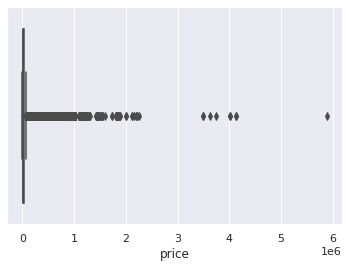

In [ ]:
# muitos outliers
sns.boxplot(df["price"])

[None]

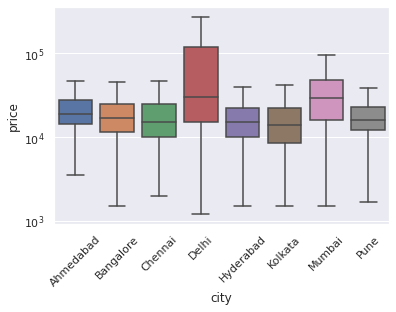

In [ ]:
# aparentemente a cidade influencia no preço
ax = sns.boxplot(data=df,
            x = df["city"],
            y = df["price"],
            showfliers = False, 
            )
plt.xticks(rotation=45)
ax.set(yscale="log")

In [ ]:
# transformar os dados, ajuda com outliers e etc
df["price_log"] = np.log(df["price"])
df["area_log"] = np.log(df["area"])

In [ ]:
# onehot
df = pd.get_dummies(df.drop("locality", axis=1), drop_first=True)
#df = df[["bedroom", "price", "area", "bathroom"]]
df.head()

,bedroom,price,area,bathroom,price_log,area_log,seller_type_BUILDER,seller_type_OWNER,layout_type_RK,property_type_Independent Floor,...,property_type_Villa,furnish_type_Semi-Furnished,furnish_type_Unfurnished,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune
0,2.0,20000.0,1450.0,2.0,9.903488,7.279319,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,7350.0,210.0,1.0,8.902456,5.347108,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3.0,22000.0,1900.0,3.0,9.998798,7.549609,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2.0,13000.0,1285.0,2.0,9.472705,7.158514,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,18000.0,1600.0,2.0,9.798127,7.377759,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(["price", "price_log"], axis=1)
y = df["price_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor()
lm = LinearRegression()
lasso = Lasso()

rf.fit(X_train, y_train)
lm.fit(X_train, y_train)
lasso.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_lm = lm.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print("MSE RF: ", mean_squared_error(y_test, y_pred_rf))
print("MSE LM: ", mean_squared_error(y_test, y_pred_lm))
print("MSE LASSO: ", mean_squared_error(y_test, y_pred_lasso))

print("R2 RF: ", r2_score(y_test, y_pred_rf))
print("R2 LM: ", r2_score(y_test, y_pred_lm))
print("R2 LASSO: ", r2_score(y_test, y_pred_lasso))

print("RMSE RF: ", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RMSE LM: ", mean_squared_error(y_test, y_pred_lm, squared=False))
print("RMSE LASSO: ", mean_squared_error(y_test, y_pred_lasso, squared=False))

MSE RF:  0.14447997640618462
MSE LM:  0.21942260490186888
MSE LASSO:  0.4028687329520718
R2 RF:  0.8322846779365841
R2 LM:  0.7452897365815508
R2 LASSO:  0.5323417059096036
RMSE RF:  0.38010521754664806
RMSE LM:  0.4684256663568606
RMSE LASSO:  0.6347194127739215


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def train_test_model(model, data, dataset, model_name):
  kfold = KFold(n_splits=5)
  Y = data["target"]
  X = data.drop("target", axis=1)

  count = 0
  index = {}

  # kfold com 5 folds
  for train_index, test_index in kfold.split(data):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    count += 1

    index[model_name + str(dataset) + "_" + str(count)] = mean_squared_error(y_test, y_pred)
  return index

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

rf = RandomForestRegressor()
lm = LinearRegression()
lasso = Lasso()

data = df.drop(["price", "price_log"], axis=1)
data["target"] = df["price_log"]

data1 = train_test_model(lm, data, 1, "linearModel")

In [ ]:
data1.update(train_test_model(rf, data, 1, "randomForest"))

In [ ]:
data1

{'linearModel1_1': 0.26057262002426623,
 'linearModel1_2': 0.32360692100888855,
 'linearModel1_3': 0.26789677324267563,
 'linearModel1_4': 0.33518885055800735,
 'linearModel1_5': 0.3215892438602057,
 'randomForest1_1': 0.17708090175036023,
 'randomForest1_2': 0.1778795651543115,
 'randomForest1_3': 0.23681970741927452,
 'randomForest1_4': 0.35695374099579,
 'randomForest1_5': 0.2586996399949596}

In [ ]:
data1.update(train_test_model(lasso, data, 1, "lasso"))

In [ ]:
data1

{'lasso1_1': 0.3109808467574476,
 'lasso1_2': 0.3516004718101653,
 'lasso1_3': 0.482183225146634,
 'lasso1_4': 0.707694131563812,
 'lasso1_5': 0.31954255398438325,
 'linearModel1_1': 0.26057262002426623,
 'linearModel1_2': 0.32360692100888855,
 'linearModel1_3': 0.26789677324267563,
 'linearModel1_4': 0.33518885055800735,
 'linearModel1_5': 0.3215892438602057,
 'randomForest1_1': 0.17708090175036023,
 'randomForest1_2': 0.1778795651543115,
 'randomForest1_3': 0.23681970741927452,
 'randomForest1_4': 0.35695374099579,
 'randomForest1_5': 0.2586996399949596}

## Dataset 2 - House prices https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/experimental/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Analise Exploratória. Código base em: https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition

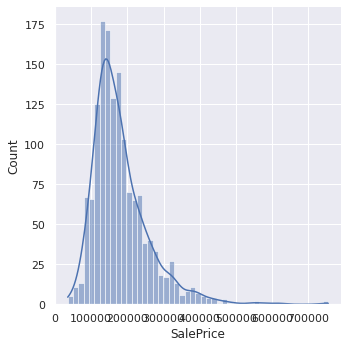

In [ ]:
sns.displot(df['SalePrice'], kde=True)


Não segue uma distribuição normal. Distroção positiva. Aparentemente sofre com curtose. 

In [ ]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
df["SalePrice"] = np.log(df["SalePrice"])

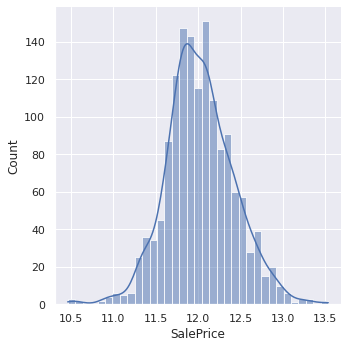

In [ ]:
sns.displot(df['SalePrice'], kde=True)


Analisando algumas variáveis

In [ ]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
  if df[i].dtype in numeric_dtypes:
    numeric.append(i)

#sns.pairplot(df[numeric])

In [ ]:
# Remover outliers
df.drop(df[(df['OverallQual']<5) & (df['SalePrice']>200000)].index, inplace=True)
df.drop(df[(df['GrLivArea']>4500) & (df['SalePrice']<300000)].index, inplace=True)
df.reset_index(drop=True, inplace=True)

Relação com variáveis númericas

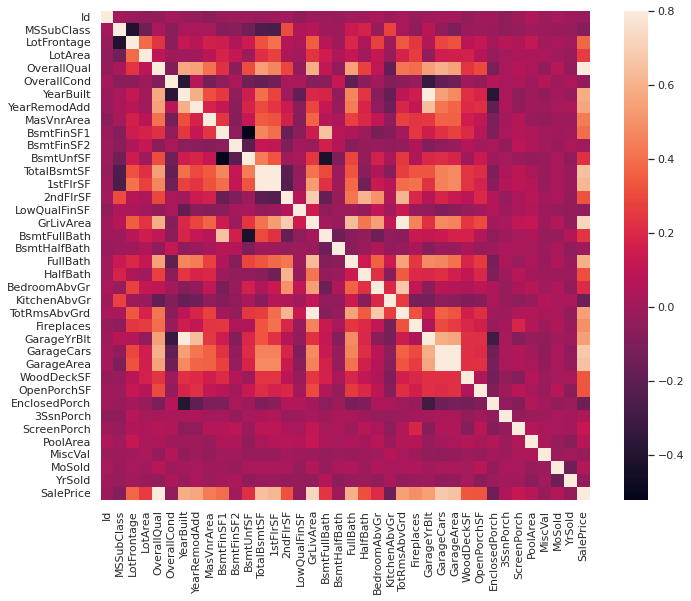

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Missing Values 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

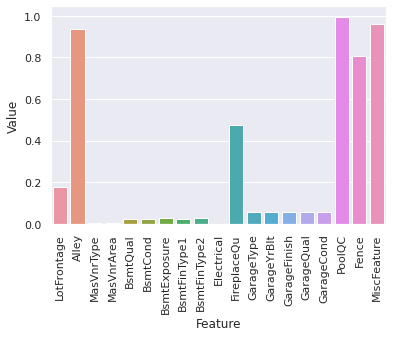

In [ ]:
data = {
    "Feature": df.isna().mean().index,
    "Value": df.isna().mean().values 
}

missing = pd.DataFrame(data)
missing = missing[missing["Value"] > 0]
ax = sns.barplot(data=missing,
                 x="Feature",
                 y="Value")
plt.xticks(rotation=90)

In [ ]:
def drop_feature_with_miss(df):
  result = df.isna().mean()
  result = result[result >= 0.15]
  columns = result.index 
  df.drop(columns, axis = 1, inplace = True) 

In [ ]:
drop_feature_with_miss(df)

In [ ]:
def handle_missing(features):
    # the data description states that NA refers to typical ('Typ') values
    features['Functional'] = features['Functional'].fillna('Typ')
    # Replace the missing values in each of the columns below with their mode
    features['Electrical'] = features['Electrical'].fillna("SBrkr")
    features['KitchenQual'] = features['KitchenQual'].fillna("TA")
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # the data description stats that NA refers to "No Pool"
    features["PoolQC"] = features["PoolQC"].fillna("None")
    # Replacing the missing values with 0, since no garage = no cars in garage
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        features[col] = features[col].fillna(0)
    # Replacing the missing values with None
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        features[col] = features[col].fillna('None')
    # NaN values for these categorical basement features, means there's no basement
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        features[col] = features[col].fillna('None')
        
    # Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # We have no particular intuition around how to fill in the rest of the categorical features
    # So we replace their missing values with None
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # And we do the same thing for numerical features, but this time with 0s
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

all_features = handle_missing(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

In [ ]:
all_features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429216


In [ ]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

In [ ]:
for i in skew_index:
    all_features[i] = boxcox1p(all_features[i], boxcox_normmax(all_features[i] + 1))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [ ]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(1458, 303)

In [ ]:
X = all_features.drop("SalePrice", axis=1)
y = all_features["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
# codigo sem a validação cruzada
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor()
lm = LinearRegression()
lasso = Lasso()

rf.fit(X_train, y_train)
lm.fit(X_train, y_train)
lasso.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_lm = lm.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print("MSE RF: ", mean_squared_error(y_test, y_pred_rf))
print("MSE LM: ", mean_squared_error(y_test, y_pred_lm))
print("MSE LASSO: ", mean_squared_error(y_test, y_pred_lasso))

print("R2 RF: ", r2_score(y_test, y_pred_rf))
print("R2 LM: ", r2_score(y_test, y_pred_lm))
print("R2 LASSO: ", r2_score(y_test, y_pred_lasso))

print("RMSE RF: ", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RMSE LM: ", mean_squared_error(y_test, y_pred_lm, squared=False))
print("RMSE LASSO: ", mean_squared_error(y_test, y_pred_lasso, squared=False))

MSE RF:  0.01926306985189282
MSE LM:  0.016165139194202354
MSE LASSO:  0.034859234653039084
R2 RF:  0.8773058061444857
R2 LM:  0.8970377651514384
R2 LASSO:  0.7779675966987903
RMSE RF:  0.13879146173988088
RMSE LM:  0.1271422006817656
RMSE LASSO:  0.18670627909376558


In [ ]:
#X = all_features.drop("SalePrice", axis=1)
#y = all_features["SalePrice"]
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.33, random_state=42)

data = all_features.drop("SalePrice", axis=1)
data["target"] = all_features["SalePrice"]

lm = LinearRegression()

data2 = train_test_model(lm, data, 2, "linearModel")

In [ ]:
rf = RandomForestRegressor()

data2.update(train_test_model(rf, data, 2, "randomForest"))

In [ ]:
lasso = Lasso()

data2.update(train_test_model(lasso, data, 2, "lasso"))

In [ ]:
## So treinar os modelos a partir daqui

## =============== Dataset 3 =============== 

https://www.kaggle.com/datasets/shree1992/housedata

In [ ]:
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/drive/MyDrive/experimental/archive.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # reading  the data
    df = pd.read_csv(zip.open("data.csv"))  
  
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.drop(["street", "statezip", "country"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.drop(df[df["price"] == 0].index, inplace=True)

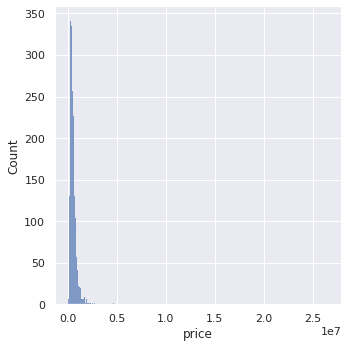

In [ ]:
sns.displot(df["price"])

In [ ]:
df["price"].describe()

count    4.551000e+03
mean     5.579059e+05
std      5.639299e+05
min      7.800000e+03
25%      3.262643e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64

In [ ]:
from scipy.stats.mstats_basic import kurtosis
print("Skewness:", df["price"].skew())
print("Peakdness: ", df["price"].kurt())

Skewness: 25.023817262008482
Peakdness:  1053.865419055905


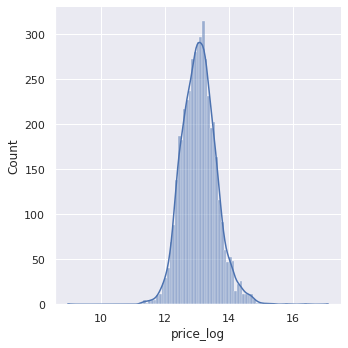

In [ ]:
df["price_log"] = np.log(df["price"])
sns.displot(df["price_log"],
            kde=True)

In [ ]:
from scipy.stats import skew

print("Skewness:", skew(df["price_log"]))
print("Peakdness: ", df["price_log"].kurt())

Skewness: 0.3298726126818522
Peakdness:  2.0847763184794865


In [ ]:
from scipy.stats import shapiro

shapiro(df["price_log"])

ShapiroResult(statistic=0.9847530126571655, pvalue=9.043211621511537e-22)

In [ ]:
def plot_some_graphs(df):
  fig, ax = plt.subplots(2, 2, sharey='row')
  sns.scatterplot(data=df,
                  y="price_log",
                  x="bedrooms", 
                  ax=ax[0, 0])

  sns.scatterplot(data=df,
                  y="price_log",
                  x="bathrooms", 
                  ax=ax[0, 1])


  sns.scatterplot(data=df,
                  y="price_log",
                  x="sqft_living", 
                  ax=ax[1, 1])



  sns.scatterplot(data=df,
                  y="price_log",
                  x="yr_built", 
                  ax=ax[1, 0])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


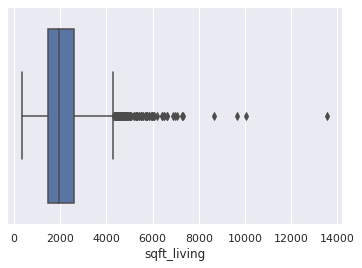

In [ ]:
sns.boxplot(df["sqft_living"])

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_log
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034,0.677507
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219,0.355346
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160,0.548583
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589,0.671307
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068,0.085856
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969,0.305319
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821,0.141863
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846,0.324040
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483,0.059256
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281,0.582012


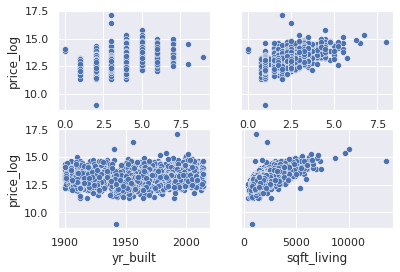

In [ ]:
plot_some_graphs(df)

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_log
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034,0.677507
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219,0.355346
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160,0.548583
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589,0.671307
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068,0.085856
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969,0.305319
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821,0.141863
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846,0.324040
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483,0.059256
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281,0.582012


In [ ]:
df = df[df["sqft_living"] <= 10000]
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_log
price,1.000000,0.206737,0.336112,0.433339,0.045333,0.151128,0.122973,0.237948,0.041688,0.368167,0.206203,0.024130,-0.032080,0.676021
bedrooms,0.206737,1.000000,0.544925,0.597606,0.064364,0.173971,-0.010437,0.110459,0.023913,0.482941,0.330021,0.141398,-0.062116,0.352888
bathrooms,0.336112,0.544925,1.000000,0.755027,0.096846,0.488370,0.056641,0.197937,-0.120105,0.682348,0.284004,0.466848,-0.219246,0.546424
sqft_living,0.433339,0.597606,0.755027,1.000000,0.196791,0.342972,0.089191,0.300235,-0.061008,0.872211,0.434215,0.291015,-0.124589,0.672815
sqft_lot,0.045333,0.064364,0.096846,0.196791,1.000000,-0.000833,0.016250,0.064079,0.002229,0.206729,0.020833,0.047973,-0.019909,0.080863
floors,0.151128,0.173971,0.488370,0.342972,-0.000833,1.000000,0.013648,0.028652,-0.273530,0.523225,-0.263756,0.466856,-0.235986,0.303959
waterfront,0.122973,-0.010437,0.056641,0.089191,0.016250,0.013648,1.000000,0.348365,0.008031,0.055856,0.079129,-0.029711,0.012737,0.131126
view,0.237948,0.110459,0.197937,0.300235,0.064079,0.028652,0.348365,1.000000,0.063831,0.164364,0.309936,-0.067077,0.026212,0.320587
condition,0.041688,0.023913,-0.120105,-0.061008,0.002229,-0.273530,0.008031,0.063831,1.000000,-0.176725,0.200978,-0.399024,-0.184488,0.060638
sqft_above,0.368167,0.482941,0.682348,0.872211,0.206729,0.523225,0.055856,0.164364,-0.176725,1.000000,-0.061885,0.411974,-0.163826,0.578993


In [ ]:
df["sqft_living_log"] = np.log(df["sqft_living"])

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_log,sqft_living_log
price,1.000000,0.206737,0.336112,0.433339,0.045333,0.151128,0.122973,0.237948,0.041688,0.368167,0.206203,0.024130,-0.032080,0.676021,0.384688
bedrooms,0.206737,1.000000,0.544925,0.597606,0.064364,0.173971,-0.010437,0.110459,0.023913,0.482941,0.330021,0.141398,-0.062116,0.352888,0.640976
bathrooms,0.336112,0.544925,1.000000,0.755027,0.096846,0.488370,0.056641,0.197937,-0.120105,0.682348,0.284004,0.466848,-0.219246,0.546424,0.759764
sqft_living,0.433339,0.597606,0.755027,1.000000,0.196791,0.342972,0.089191,0.300235,-0.061008,0.872211,0.434215,0.291015,-0.124589,0.672815,0.955694
sqft_lot,0.045333,0.064364,0.096846,0.196791,1.000000,-0.000833,0.016250,0.064079,0.002229,0.206729,0.020833,0.047973,-0.019909,0.080863,0.175095
floors,0.151128,0.173971,0.488370,0.342972,-0.000833,1.000000,0.013648,0.028652,-0.273530,0.523225,-0.263756,0.466856,-0.235986,0.303959,0.355169
waterfront,0.122973,-0.010437,0.056641,0.089191,0.016250,0.013648,1.000000,0.348365,0.008031,0.055856,0.079129,-0.029711,0.012737,0.131126,0.065952
view,0.237948,0.110459,0.197937,0.300235,0.064079,0.028652,0.348365,1.000000,0.063831,0.164364,0.309936,-0.067077,0.026212,0.320587,0.259536
condition,0.041688,0.023913,-0.120105,-0.061008,0.002229,-0.273530,0.008031,0.063831,1.000000,-0.176725,0.200978,-0.399024,-0.184488,0.060638,-0.050696
sqft_above,0.368167,0.482941,0.682348,0.872211,0.206729,0.523225,0.055856,0.164364,-0.176725,1.000000,-0.061885,0.411974,-0.163826,0.578993,0.831159


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


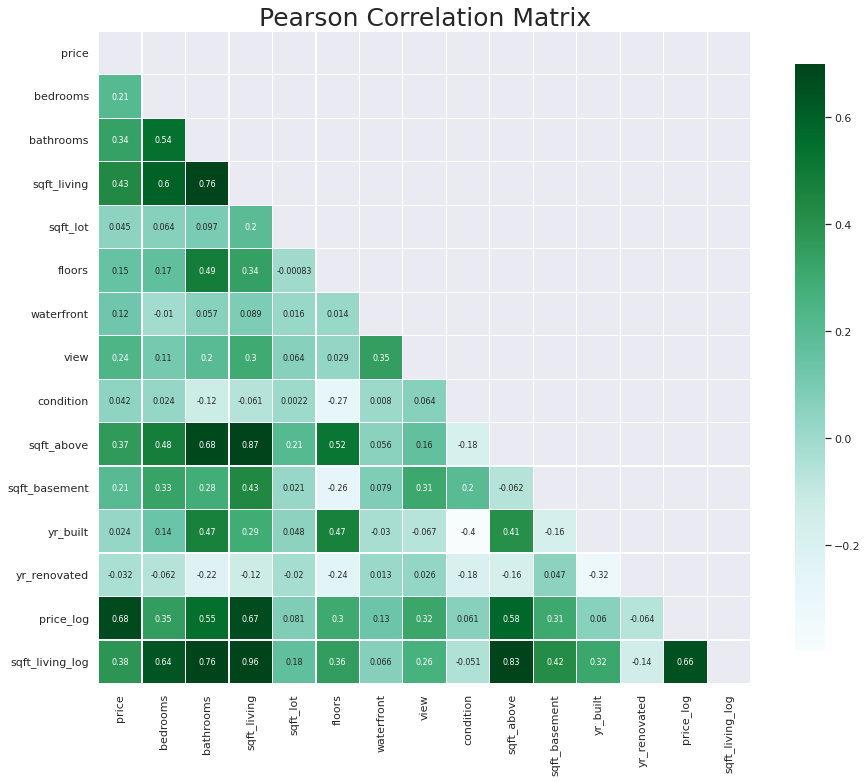

In [ ]:
# Thanks to: https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
# sqft living e above dizem quase a mesma coisa
df.drop("sqft_above", axis=1, inplace=True)

In [ ]:
df["yr_renovated"] = df["yr_renovated"].apply(lambda x: 0 if x == 0 else 1)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

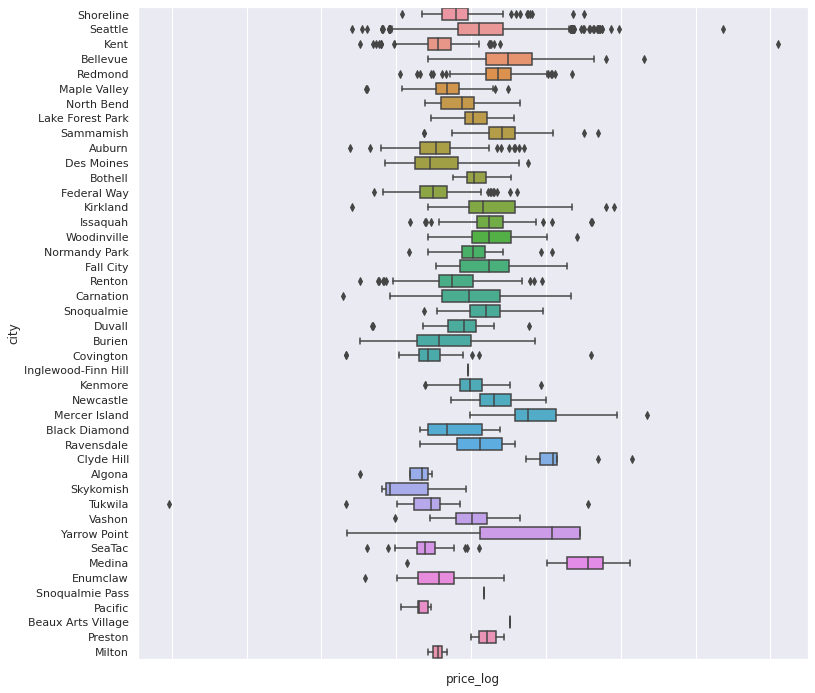

In [ ]:
plt.figure(figsize = (12, 12))
ax = sns.boxplot(data=df,
            x="price_log",
            y="city")

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(8.0, 0, ''),
 Text(9.0, 0, ''),
 Text(10.0, 0, ''),
 Text(11.0, 0, ''),
 Text(12.0, 0, ''),
 Text(13.0, 0, ''),
 Text(14.0, 0, ''),
 Text(15.0, 0, ''),
 Text(16.0, 0, ''),
 Text(17.0, 0, ''),
 Text(18.0, 0, '')]

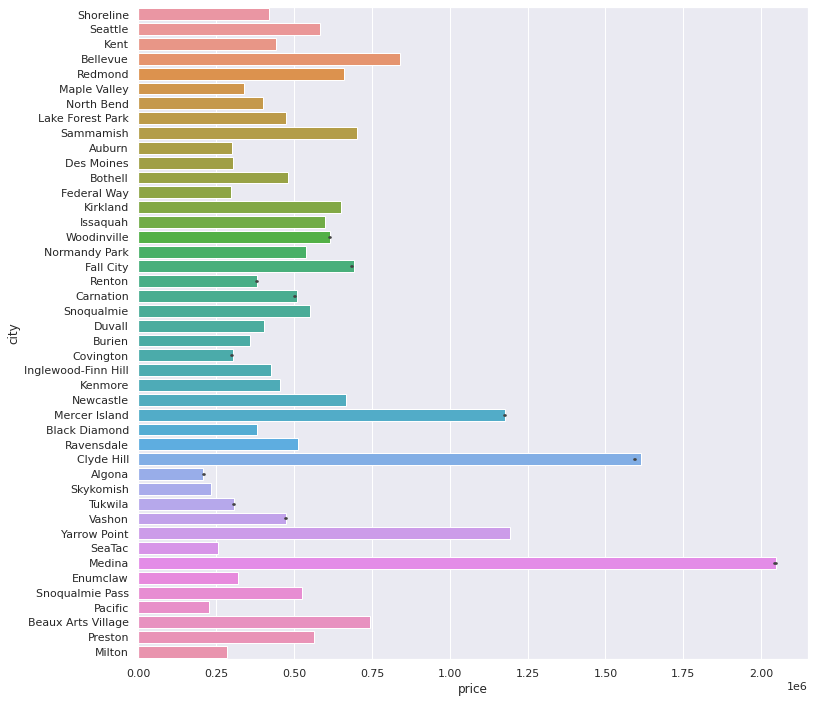

In [ ]:
plt.figure(figsize = (12, 12))
sns.barplot(data = df,
            y = "city",
            x = "price",
            ci = .95)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=90)


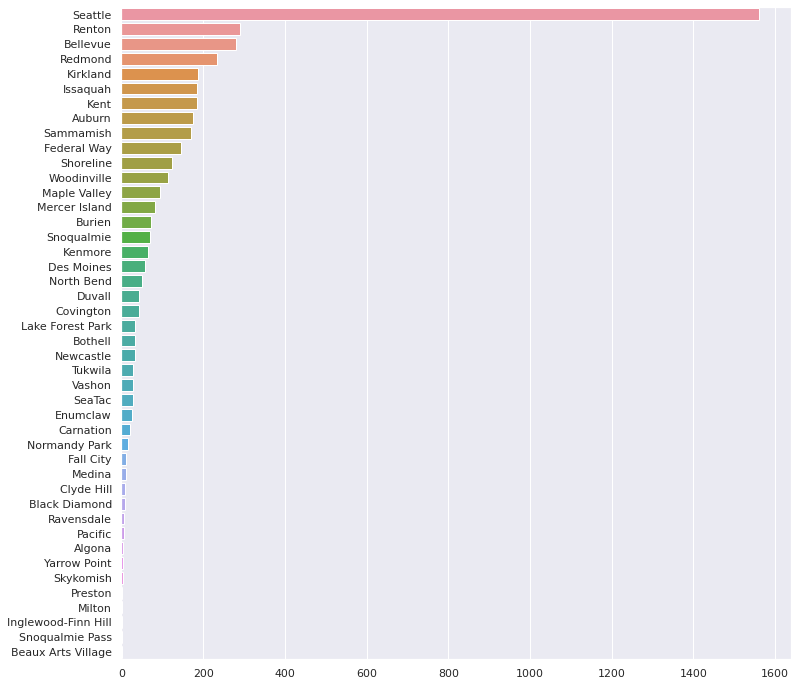

In [ ]:
plt.figure(figsize = (12, 12))
sns.barplot(x = df["city"].value_counts().values,
            y = df["city"].value_counts().index)
            

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,price_log,sqft_living_log
price,1.000000,0.206737,0.336112,0.433339,0.045333,0.151128,0.122973,0.237948,0.041688,0.206203,0.024130,-0.031865,0.676021,0.384688
bedrooms,0.206737,1.000000,0.544925,0.597606,0.064364,0.173971,-0.010437,0.110459,0.023913,0.330021,0.141398,-0.061797,0.352888,0.640976
bathrooms,0.336112,0.544925,1.000000,0.755027,0.096846,0.488370,0.056641,0.197937,-0.120105,0.284004,0.466848,-0.218292,0.546424,0.759764
sqft_living,0.433339,0.597606,0.755027,1.000000,0.196791,0.342972,0.089191,0.300235,-0.061008,0.434215,0.291015,-0.124057,0.672815,0.955694
sqft_lot,0.045333,0.064364,0.096846,0.196791,1.000000,-0.000833,0.016250,0.064079,0.002229,0.020833,0.047973,-0.020370,0.080863,0.175095
floors,0.151128,0.173971,0.488370,0.342972,-0.000833,1.000000,0.013648,0.028652,-0.273530,-0.263756,0.466856,-0.234395,0.303959,0.355169
waterfront,0.122973,-0.010437,0.056641,0.089191,0.016250,0.013648,1.000000,0.348365,0.008031,0.079129,-0.029711,0.012627,0.131126,0.065952
view,0.237948,0.110459,0.197937,0.300235,0.064079,0.028652,0.348365,1.000000,0.063831,0.309936,-0.067077,0.026117,0.320587,0.259536
condition,0.041688,0.023913,-0.120105,-0.061008,0.002229,-0.273530,0.008031,0.063831,1.000000,0.200978,-0.399024,-0.183014,0.060638,-0.050696
sqft_basement,0.206203,0.330021,0.284004,0.434215,0.020833,-0.263756,0.079129,0.309936,0.200978,1.000000,-0.164890,0.046940,0.306593,0.419411


In [ ]:
df.drop(["yr_built", "waterfront", "yr_renovated", "sqft_lot", "condition", "date"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


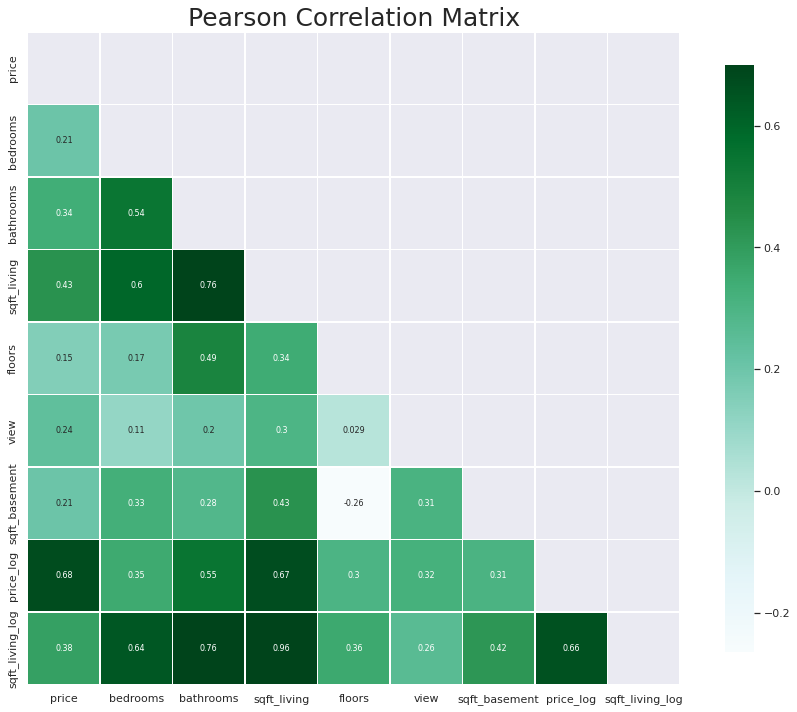

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,price_log,sqft_living_log,city_Auburn,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,1.5,0,0,12.653958,7.200425,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,2.0,4,280,14.684290,8.202482,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,1.0,0,0,12.742566,7.565275,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,1.0,0,1000,12.948010,7.600902,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,1.0,0,800,13.217674,7.570443,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4599
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     4549 non-null   float64
 1   bedrooms                  4549 non-null   float64
 2   bathrooms                 4549 non-null   float64
 3   sqft_living               4549 non-null   int64  
 4   floors                    4549 non-null   float64
 5   view                      4549 non-null   int64  
 6   sqft_basement             4549 non-null   int64  
 7   price_log                 4549 non-null   float64
 8   sqft_living_log           4549 non-null   float64
 9   city_Auburn               4549 non-null   uint8  
 10  city_Beaux Arts Village   4549 non-null   uint8  
 11  city_Bellevue             4549 non-null   uint8  
 12  city_Black Diamond        4549 non-null   uint8  
 13  city_Bothell              4549 non-null   uint8  
 14  city_Bur

In [ ]:
# codigo sem a validação cruzada
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X =  df.drop(["price", "price_log"], axis=1)
y =  df["price_log"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

rf = RandomForestRegressor()
lm = LinearRegression()
lasso = Lasso()

rf.fit(X_train, y_train)
lm.fit(X_train, y_train)
lasso.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_lm = lm.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print("MSE RF: ", mean_squared_error(y_test, y_pred_rf))
print("MSE LM: ", mean_squared_error(y_test, y_pred_lm))
print("MSE LASSO: ", mean_squared_error(y_test, y_pred_lasso))

print("R2 RF: ", r2_score(y_test, y_pred_rf))
print("R2 LM: ", r2_score(y_test, y_pred_lm))
print("R2 LASSO: ", r2_score(y_test, y_pred_lasso))

print("RMSE RF: ", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RMSE LM: ", mean_squared_error(y_test, y_pred_lm, squared=False))
print("RMSE LASSO: ", mean_squared_error(y_test, y_pred_lasso, squared=False))

MSE RF:  0.09546576352989107
MSE LM:  0.08191361517924213
MSE LASSO:  0.15053179657864088
R2 RF:  0.6667426117004311
R2 LM:  0.7140512320706174
R2 LASSO:  0.47451493049513493
RMSE RF:  0.30897534453397907
RMSE LM:  0.2862055470797904
RMSE LASSO:  0.38798427362283755


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

rf = RandomForestRegressor()
lm = LinearRegression()
lasso = Lasso()

data = df.drop(["price", "price_log"], axis=1)
data["target"] = df["price_log"]

data3 = train_test_model(lm, data, 3, "linearModel")
data3.update(train_test_model(rf, data, 3, "randomForest"))
data3.update(train_test_model(lasso, data, 3, "lasso"))


In [ ]:
data3

{'lasso3_1': 0.13465403689561722,
 'lasso3_2': 0.1476062364938255,
 'lasso3_3': 0.135640650670338,
 'lasso3_4': 0.13779134769203485,
 'lasso3_5': 0.24667661136732294,
 'linearModel3_1': 0.05866627307553877,
 'linearModel3_2': 0.07400731721979265,
 'linearModel3_3': 0.05755393687845289,
 'linearModel3_4': 0.058586358853223025,
 'linearModel3_5': 0.17815043486319804,
 'randomForest3_1': 0.07277932303563518,
 'randomForest3_2': 0.0906450154879114,
 'randomForest3_3': 0.0738784013388832,
 'randomForest3_4': 0.0768020837708036,
 'randomForest3_5': 0.17805419597776698}

In [ ]:
data1.update(data3)

In [ ]:
data1

{'lasso1_1': 0.3109808467574476,
 'lasso1_2': 0.3516004718101653,
 'lasso1_3': 0.482183225146634,
 'lasso1_4': 0.707694131563812,
 'lasso1_5': 0.31954255398438325,
 'lasso2_1': 0.03262755292988901,
 'lasso2_2': 0.03523533357828243,
 'lasso2_3': 0.036041304080416316,
 'lasso2_4': 0.039269738888971326,
 'lasso2_5': 0.03443652162793467,
 'lasso3_1': 0.13465403689561722,
 'lasso3_2': 0.1476062364938255,
 'lasso3_3': 0.135640650670338,
 'lasso3_4': 0.13779134769203485,
 'lasso3_5': 0.24667661136732294,
 'linearModel1_1': 0.26057262002426623,
 'linearModel1_2': 0.32360692100888855,
 'linearModel1_3': 0.26789677324267563,
 'linearModel1_4': 0.33518885055800735,
 'linearModel1_5': 0.3215892438602057,
 'linearModel2_1': 0.014190740159076124,
 'linearModel2_2': 0.016344615376627642,
 'linearModel2_3': 0.019174802837470615,
 'linearModel2_4': 0.012127678277354274,
 'linearModel2_5': 0.0140545991654851,
 'linearModel3_1': 0.05866627307553877,
 'linearModel3_2': 0.07400731721979265,
 'linearModel3_

# Dataset 4 - https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge?select=test.csv

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/experimental/train_india.csv")
df_test =  pd.read_csv("/content/drive/MyDrive/experimental/train_india.csv")
df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df_train.drop("ADDRESS", axis=1, inplace=True)
df_test.drop("ADDRESS", axis=1, inplace=True)

In [ ]:
df_train["TARGET(PRICE_IN_LACS)"] = np.log(df_train["TARGET(PRICE_IN_LACS)"])
df_test["TARGET(PRICE_IN_LACS)"] = np.log(df_test["TARGET(PRICE_IN_LACS)"])


In [ ]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [ ]:
# codigo sem a validação cruzada
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test = df_train.drop("TARGET(PRICE_IN_LACS)", axis=1), df_test.drop("TARGET(PRICE_IN_LACS)", axis=1)
y_train, y_test = df_train["TARGET(PRICE_IN_LACS)"], df_test["TARGET(PRICE_IN_LACS)"]

rf = RandomForestRegressor()
lm = LinearRegression()
lasso = Lasso()

rf.fit(X_train, y_train)
lm.fit(X_train, y_train)
lasso.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_lm = lm.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print("MSE RF: ", mean_squared_error(y_test, y_pred_rf))
print("MSE LM: ", mean_squared_error(y_test, y_pred_lm))
print("MSE LASSO: ", mean_squared_error(y_test, y_pred_lasso))

print("R2 RF: ", r2_score(y_test, y_pred_rf))
print("R2 LM: ", r2_score(y_test, y_pred_lm))
print("R2 LASSO: ", r2_score(y_test, y_pred_lasso))

print("RMSE RF: ", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RMSE LM: ", mean_squared_error(y_test, y_pred_lm, squared=False))
print("RMSE LASSO: ", mean_squared_error(y_test, y_pred_lasso, squared=False))

MSE RF:  0.01795063618680436
MSE LM:  0.4875613271974304
MSE LASSO:  0.8056270183418669
R2 RF:  0.9778100814341294
R2 LM:  0.39729455637166544
R2 LASSO:  0.004113406041146073
RMSE RF:  0.13397998427677307
RMSE LM:  0.6982559181256042
RMSE LASSO:  0.8975672778916726


# Dataset 5 - https://www.kaggle.com/datasets/amaanafif/chennai-house-price

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/experimental/clean_data.csv")
df.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [ ]:
df["bathroom"].unique()

array([nan,  2.,  1.,  3.,  4.,  5.,  6.,  7.])

In [ ]:
df["bathroom"].fillna(0, inplace=True)

In [ ]:
df["age"].fillna(df["age"].mean(), inplace=True)

In [ ]:
df.drop(["location", "builder"], axis=1, inplace=True)

In [ ]:
df["price"] = np.log(df["price"])

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,price,area,bhk,bathroom,age,status_Under Construction
0,3.624074,872,2,0.0,1.000000,0
1,4.538389,1346,3,2.0,1.355119,1
2,5.017280,2225,3,0.0,0.000000,1
3,3.891820,1028,2,2.0,3.000000,0
4,3.744314,588,2,1.0,0.000000,1


In [ ]:
# codigo sem a validação cruzada
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

rf = RandomForestRegressor()
lm = LinearRegression()
lasso = Lasso()

rf.fit(X_train, y_train)
lm.fit(X_train, y_train)
lasso.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_lm = lm.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print("MSE RF: ", mean_squared_error(y_test, y_pred_rf))
print("MSE LM: ", mean_squared_error(y_test, y_pred_lm))
print("MSE LASSO: ", mean_squared_error(y_test, y_pred_lasso))

print("R2 RF: ", r2_score(y_test, y_pred_rf))
print("R2 LM: ", r2_score(y_test, y_pred_lm))
print("R2 LASSO: ", r2_score(y_test, y_pred_lasso))

print("RMSE RF: ", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RMSE LM: ", mean_squared_error(y_test, y_pred_lm, squared=False))
print("RMSE LASSO: ", mean_squared_error(y_test, y_pred_lasso, squared=False))

MSE RF:  0.10326491207273183
MSE LM:  0.15544723368727498
MSE LASSO:  0.1681107524853939
R2 RF:  0.7936998760474089
R2 LM:  0.6894513060236235
R2 LASSO:  0.664152436879302
RMSE RF:  0.321348583430411
RMSE LM:  0.39426797192680385
RMSE LASSO:  0.41001311257738315


## Dados para o experimento

In [ ]:
data = {
    "rf_1":  0.09773409840389369,
    "lm_1":  0.08191361517924213,
    "lasso_1":  0.15053179657864088,
    "rf_2":  0.019822085618431597,
    "lm_2":  0.016165139194202354,
    "lasso_2":  0.034859234653039084,
    "rf_3":  0.1446016071407616,
    "lm_3":  0.21942260490186888,
    "lasso_3":  0.4028687329520718,
    "rf_4":  0.01853176337613036,
    "lm_4":  0.4875613271974304,
    "lasso_4":  0.8056270183418669,
    "rf_5":  0.10301816980122472,
    "lm_5":  0.15544723368727498,
    "lasso_5":  0.1681107524853939
}

data = {
    "rf_1":  0.8322846779365841,
    "lm_1":   0.7452897365815508,
    "lasso_1":  0.5323417059096036,
    "rf_2":  0.8773058061444857,
    "lm_2":  0.8970377651514384,
    "lasso_2":  0.7779675966987903,
    "rf_3":  0.6667426117004311,
    "lm_3":  0.7140512320706174,
    "lasso_3":  0.47451493049513493,
    "rf_4":  0.9778100814341294,
    "lm_4":  0.39729455637166544,
    "lasso_4":  0.004113406041146073,
    "rf_5":  0.7936998760474089,
    "lm_5":  0.6894513060236235,
    "lasso_5":  0.664152436879302
}



keys = data.keys()
values = data.values()
data = {
    "dataset": keys,
    "R2": values
}
data_df = pd.DataFrame(data=data)
data_df.head()

,dataset,R2
0,rf_1,0.832285
1,lm_1,0.745290
2,lasso_1,0.532342
3,rf_2,0.877306
4,lm_2,0.897038


In [ ]:
data_df["model"] = data_df["dataset"].str.split("_", expand=True)[0]
data_df["dataset"] = data_df["dataset"].str.split("_", expand=True)[1]

In [ ]:
data_df.to_csv("resultados_r2.csv", index=None)